# UCD ECO Python Tools - Tutorial

In [2]:
import pandas as pd
import os
import requests as req
import json
import numpy as np
import datetime

from matplotlib import style
import matplotlib
%matplotlib inline
style.use('ggplot')

#  new modules - marco.pritoni@gmail.com
from PIPy_Datalink import *
from Data_Preprocessor import *

## PI datalink - Python implementation

In [3]:
p=pipy_datalink()

https://ucd-pi-iis.ou.ad3.ucdavis.edu/piwebapi/streams/A0EbgZy4oKQ9kiBiZJTW7eugwNFN9S7KS5BG0-xgDcyrprwDXFgAtlASVonZNgP17EChQVVRJTC1BRlxDRUZTXFVDREFWSVNcQlVJTERJTkdTXFBMQU5UICYgRU5WSVJPTk1FTlRBTCBTQ0lFTkNFU1xFTEVDVFJJQ0lUWXxERU1BTkRfS0JUVQ/interpolated
<Response [200]>
https://ucd-pi-iis.ou.ad3.ucdavis.edu/piwebapi/streams/A0EbgZy4oKQ9kiBiZJTW7eugwNFN9S7KS5BG0-xgDcyrprwDXFgAtlASVonZNgP17EChQVVRJTC1BRlxDRUZTXFVDREFWSVNcQlVJTERJTkdTXFBMQU5UICYgRU5WSVJPTk1FTlRBTCBTQ0lFTkNFU1xFTEVDVFJJQ0lUWXxERU1BTkRfS0JUVQ/interpolated
<Response [200]>


,UnknownName
2016-01-22 08:00:00,1129.0
2016-01-22 09:00:00,1092.0
2016-01-22 10:00:00,1109.0
2016-01-22 11:00:00,1112.0
2016-01-22 12:00:00,1133.0


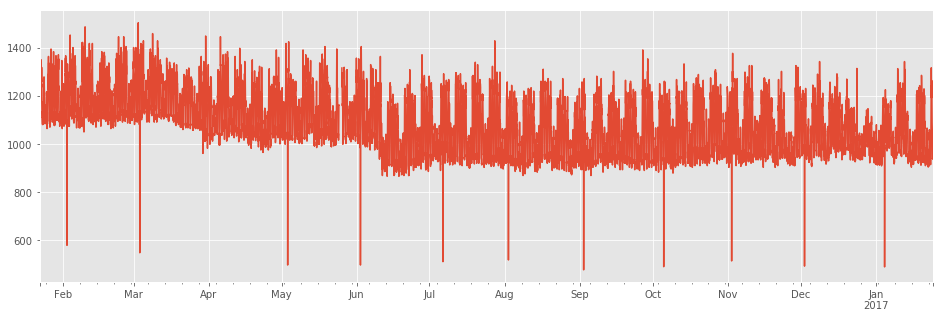

In [4]:
## method get_stream()
## get the stream by WebID
## input: Web ID
## 
## output: pandas DataFrame/dictionary
##
## arguments: 
## Web_ID=None : - the unique identifier of the time series 
## _start="y" : - start date, default yesterday "y"; can use different formats as "YYYY-MM-DD";
## _end="t" : - end date, default yesterday "t"; can use different formats as "YYYY-MM-DD";        
## _calculation="interpolated": can use "recorded" to get raw data and summary to get summary data (tot, mean, sd);
## note: summary data is not a time series, but a dictionary
## _interval="1h": interpolation interval, used only with interpolated; default 1 hour
## _controller=None : not used at the moment; needed for future extensions 
#  _sumType=None : used if calculation is "summary", can use All, Total, default Total
#  _label=None : not used at the moment; needed for future extensions 

Web_ID="A0EbgZy4oKQ9kiBiZJTW7eugwNFN9S7KS5BG0-xgDcyrprwDXFgAtlASVonZNgP17EChQVVRJTC1BRlxDRUZTXFVDREFWSVNcQlVJTERJTkdTXFBMQU5UICYgRU5WSVJPTk1FTlRBTCBTQ0lFTkNFU1xFTEVDVFJJQ0lUWXxERU1BTkRfS0JUVQ"

# plot and show results
p.get_stream(Web_ID,_start="2016-01-22", _end="2017-01-24", _label="UnknownName").plot(figsize=(16,5), legend=False)
p.get_stream(Web_ID,_start="2016-01-22", _end="2017-01-24",_label="UnknownName").head()

In [5]:
## example using the _calculation="summary"
Web_ID="A0EbgZy4oKQ9kiBiZJTW7eugwNFN9S7KS5BG0-xgDcyrprwDXFgAtlASVonZNgP17EChQVVRJTC1BRlxDRUZTXFVDREFWSVNcQlVJTERJTkdTXFBMQU5UICYgRU5WSVJPTk1FTlRBTCBTQ0lFTkNFU1xFTEVDVFJJQ0lUWXxERU1BTkRfS0JUVQ"

# plot and show results
p.get_stream(Web_ID,_start="2017-01-22", _end="2017-01-24", _calculation="summary",_sumType="All",_label="UnknownName")

https://ucd-pi-iis.ou.ad3.ucdavis.edu/piwebapi/streams/A0EbgZy4oKQ9kiBiZJTW7eugwNFN9S7KS5BG0-xgDcyrprwDXFgAtlASVonZNgP17EChQVVRJTC1BRlxDRUZTXFVDREFWSVNcQlVJTERJTkdTXFBMQU5UICYgRU5WSVJPTk1FTlRBTCBTQ0lFTkNFU1xFTEVDVFJJQ0lUWXxERU1BTkRfS0JUVQ/summary
<Response [200]>


,UnknownName
Count,172800.000000
PopulationStdDev,112.734120
PercentGood,100.000000
Average,1021.991123
Maximum,1381.517456
Range,503.370850
Minimum,878.146606
StdDev,112.734120
Total,2043.982246


P09KoOKByvc0-uxyvoTV1UfQcGQAAAVVRJTC1QSS1QXEdIQVVTSS5BSFUwMS5STTExMTM6Uk9PTS5URU1Q
https://ucd-pi-iis.ou.ad3.ucdavis.edu/piwebapi/streams/P09KoOKByvc0-uxyvoTV1UfQcGQAAAVVRJTC1QSS1QXEdIQVVTSS5BSFUwMS5STTExMTM6Uk9PTS5URU1Q/interpolated
<Response [200]>


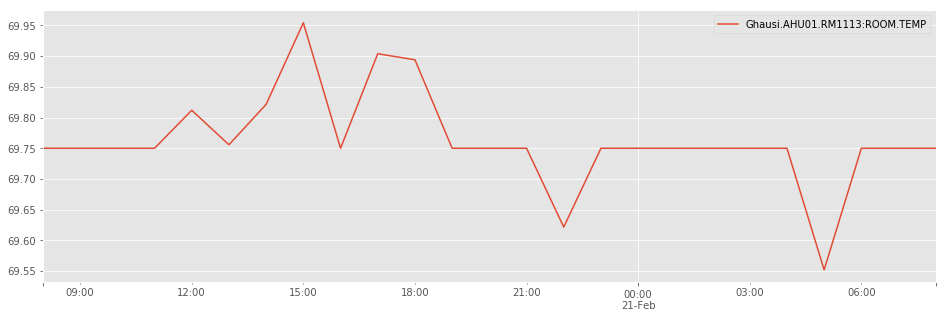

In [6]:
## get_stream_by_point()
##
## getting the data by WebIDs is not pratical
## we want to get the data by data point name 
## 
## input: point name; can use *  
##
## output: pandas DataFrame/dictionary
##
##
## arguments: 
## point_name : - the name is unique in each database 
## _start="y" : - start date, default yesterday "y"; can use different formats as "YYYY-MM-DD";
## _end="t" : - end date, default yesterday "t"; can use different formats as "YYYY-MM-DD";        
## _calculation="interpolated": can use "recorded" to get raw data and summary to get summary data (tot, mean, sd);
## note: summary data is not a time series, but a dictionary
## _interval="1h": interpolation interval, used only with interpolated; default 1 hour
## _controller=None : not used at the moment; needed for future extensions 
#  _sumType=None : used if calculation is "summary", can use All, Total, default Total
#  _label=None : not used at the moment; needed for future extensions 
# dataserver : there can be more databases in a PI environment; default "s09KoOKByvc0-uxyvoTV1UfQVVRJTC1QSS1Q"

point_name="Ghausi.AHU01.RM1113:ROOM.TEMP"

p.get_stream_by_point(point_name).plot(figsize=(16,5))

Ghausi.AHU01.RM1113:ROOM.TEMP
P09KoOKByvc0-uxyvoTV1UfQcGQAAAVVRJTC1QSS1QXEdIQVVTSS5BSFUwMS5STTExMTM6Uk9PTS5URU1Q
https://ucd-pi-iis.ou.ad3.ucdavis.edu/piwebapi/streams/P09KoOKByvc0-uxyvoTV1UfQcGQAAAVVRJTC1QSS1QXEdIQVVTSS5BSFUwMS5STTExMTM6Uk9PTS5URU1Q/interpolated
<Response [200]>
Ghausi.AHU01.RM1113:ROOM.DAT
P09KoOKByvc0-uxyvoTV1UfQtWMAAAVVRJTC1QSS1QXEdIQVVTSS5BSFUwMS5STTExMTM6Uk9PTS5EQVQ
https://ucd-pi-iis.ou.ad3.ucdavis.edu/piwebapi/streams/P09KoOKByvc0-uxyvoTV1UfQtWMAAAVVRJTC1QSS1QXEdIQVVTSS5BSFUwMS5STTExMTM6Uk9PTS5EQVQ/interpolated
<Response [200]>
Ghausi.AHU01.RM1113:ROOM.TEMP
P09KoOKByvc0-uxyvoTV1UfQcGQAAAVVRJTC1QSS1QXEdIQVVTSS5BSFUwMS5STTExMTM6Uk9PTS5URU1Q
https://ucd-pi-iis.ou.ad3.ucdavis.edu/piwebapi/streams/P09KoOKByvc0-uxyvoTV1UfQcGQAAAVVRJTC1QSS1QXEdIQVVTSS5BSFUwMS5STTExMTM6Uk9PTS5URU1Q/interpolated
<Response [200]>
Ghausi.AHU01.RM1113:ROOM.DAT
P09KoOKByvc0-uxyvoTV1UfQtWMAAAVVRJTC1QSS1QXEdIQVVTSS5BSFUwMS5STTExMTM6Uk9PTS5EQVQ
https://ucd-pi-iis.ou.ad3.ucdavis.edu/piwebapi/st

,Ghausi.AHU01.RM1113:ROOM.TEMP,Ghausi.AHU01.RM1113:ROOM.DAT
2017-02-20 08:00:00,69.750000,68.63594
2017-02-20 09:00:00,69.750000,68.56512
2017-02-20 10:00:00,69.750000,68.36980
2017-02-20 11:00:00,69.750000,69.00000
2017-02-20 12:00:00,69.811844,69.01597


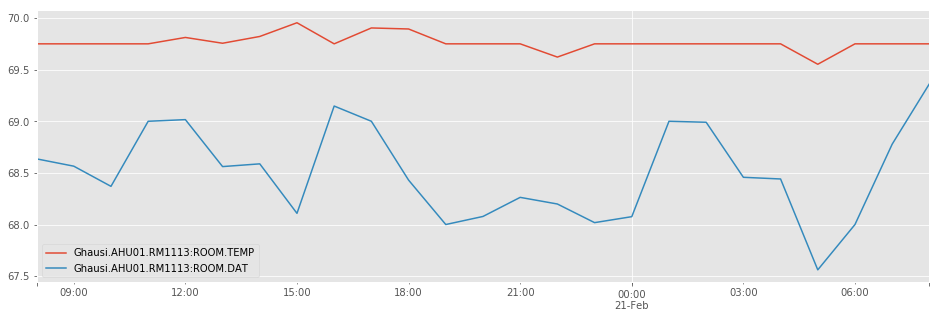

In [7]:
# test this with multiple point names

point_nm=["Ghausi.AHU01.RM1113:ROOM.TEMP","Ghausi.AHU01.RM1113:ROOM.DAT"]

p.get_stream_by_point(point_nm).plot(figsize=(16,5))
p.get_stream_by_point(point_nm).head()

In [8]:
# show that also the summary works for multiple columns
p.get_stream_by_point(point_nm,_start="2017-01-22", _end="2017-01-24", _calculation="summary",_sumType="All",_label="UnknownName")

Ghausi.AHU01.RM1113:ROOM.TEMP
P09KoOKByvc0-uxyvoTV1UfQcGQAAAVVRJTC1QSS1QXEdIQVVTSS5BSFUwMS5STTExMTM6Uk9PTS5URU1Q
https://ucd-pi-iis.ou.ad3.ucdavis.edu/piwebapi/streams/P09KoOKByvc0-uxyvoTV1UfQcGQAAAVVRJTC1QSS1QXEdIQVVTSS5BSFUwMS5STTExMTM6Uk9PTS5URU1Q/summary
<Response [200]>
Ghausi.AHU01.RM1113:ROOM.DAT
P09KoOKByvc0-uxyvoTV1UfQtWMAAAVVRJTC1QSS1QXEdIQVVTSS5BSFUwMS5STTExMTM6Uk9PTS5EQVQ
https://ucd-pi-iis.ou.ad3.ucdavis.edu/piwebapi/streams/P09KoOKByvc0-uxyvoTV1UfQtWMAAAVVRJTC1QSS1QXEdIQVVTSS5BSFUwMS5STTExMTM6Uk9PTS5EQVQ/summary
<Response [200]>


,Ghausi.AHU01.RM1113:ROOM.TEMP,Ghausi.AHU01.RM1113:ROOM.DAT
Count,172800.000000,172800.000000
PopulationStdDev,0.271145,0.927055
PercentGood,99.967414,99.967414
Average,69.951389,68.914344
Maximum,70.750000,71.000000
Range,1.250000,4.500000
Minimum,69.500000,66.500000
StdDev,0.271145,0.927055
Total,139.902778,137.828688


In [9]:
# test of calculatio _end
point_nm=["Ghausi.AHU01.RM1113:ROOM.TEMP","Ghausi.AHU01.RM1113:ROOM.DAT"]

p.get_stream_by_point(point_nm,_start="2017-01-22", _end="2017-01-24", _calculation="end",_sumType="All",_label="UnknownName")

Ghausi.AHU01.RM1113:ROOM.TEMP
P09KoOKByvc0-uxyvoTV1UfQcGQAAAVVRJTC1QSS1QXEdIQVVTSS5BSFUwMS5STTExMTM6Uk9PTS5URU1Q
https://ucd-pi-iis.ou.ad3.ucdavis.edu/piwebapi/streams/P09KoOKByvc0-uxyvoTV1UfQcGQAAAVVRJTC1QSS1QXEdIQVVTSS5BSFUwMS5STTExMTM6Uk9PTS5URU1Q/end
<Response [200]>
Ghausi.AHU01.RM1113:ROOM.DAT
P09KoOKByvc0-uxyvoTV1UfQtWMAAAVVRJTC1QSS1QXEdIQVVTSS5BSFUwMS5STTExMTM6Uk9PTS5EQVQ
https://ucd-pi-iis.ou.ad3.ucdavis.edu/piwebapi/streams/P09KoOKByvc0-uxyvoTV1UfQtWMAAAVVRJTC1QSS1QXEdIQVVTSS5BSFUwMS5STTExMTM6Uk9PTS5EQVQ/end
<Response [200]>


,Ghausi.AHU01.RM1113:ROOM.TEMP,Ghausi.AHU01.RM1113:ROOM.DAT
Timestamp,2017-02-21T19:32:47.9960021Z,2017-02-21T19:37:37.7100067Z
Good,True,True
Value,69.75,68


In [10]:
## search_by_point()
## method to search for data points names using * 
##
## output: list of point names and dictionary of point name: WebIDs

l, d = p.search_by_point("OAT")
l

[u'OAT']

In [11]:
d

{u'OAT': u'P09KoOKByvc0-uxyvoTV1UfQzo8BAAVVRJTC1QSS1QXE9BVA'}

## Clean Data 

In [12]:
# find meters at Ghausi Hall
p.search_by_point("Ghausi*BTU")

([u'Ghausi_ChilledWater_Demand_kBtu',
  u'Ghausi_Electricity_Demand_kBtu',
  u'Ghausi_Steam_Demand_kBtu'],
 {u'Ghausi_ChilledWater_Demand_kBtu': u'P09KoOKByvc0-uxyvoTV1UfQ1yMAAAVVRJTC1QSS1QXEdIQVVTSV9DSElMTEVEV0FURVJfREVNQU5EX0tCVFU',
  u'Ghausi_Electricity_Demand_kBtu': u'P09KoOKByvc0-uxyvoTV1UfQdBkAAAVVRJTC1QSS1QXEdIQVVTSV9FTEVDVFJJQ0lUWV9ERU1BTkRfS0JUVQ',
  u'Ghausi_Steam_Demand_kBtu': u'P09KoOKByvc0-uxyvoTV1UfQ2CMAAAVVRJTC1QSS1QXEdIQVVTSV9TVEVBTV9ERU1BTkRfS0JUVQ'})

Ghausi_ChilledWater_Demand_kBtu
P09KoOKByvc0-uxyvoTV1UfQ1yMAAAVVRJTC1QSS1QXEdIQVVTSV9DSElMTEVEV0FURVJfREVNQU5EX0tCVFU
https://ucd-pi-iis.ou.ad3.ucdavis.edu/piwebapi/streams/P09KoOKByvc0-uxyvoTV1UfQ1yMAAAVVRJTC1QSS1QXEdIQVVTSV9DSElMTEVEV0FURVJfREVNQU5EX0tCVFU/interpolated
<Response [200]>
Ghausi_Electricity_Demand_kBtu
P09KoOKByvc0-uxyvoTV1UfQdBkAAAVVRJTC1QSS1QXEdIQVVTSV9FTEVDVFJJQ0lUWV9ERU1BTkRfS0JUVQ
https://ucd-pi-iis.ou.ad3.ucdavis.edu/piwebapi/streams/P09KoOKByvc0-uxyvoTV1UfQdBkAAAVVRJTC1QSS1QXEdIQVVTSV9FTEVDVFJJQ0lUWV9ERU1BTkRfS0JUVQ/interpolated
<Response [200]>
Ghausi_Steam_Demand_kBtu
P09KoOKByvc0-uxyvoTV1UfQ2CMAAAVVRJTC1QSS1QXEdIQVVTSV9TVEVBTV9ERU1BTkRfS0JUVQ
https://ucd-pi-iis.ou.ad3.ucdavis.edu/piwebapi/streams/P09KoOKByvc0-uxyvoTV1UfQ2CMAAAVVRJTC1QSS1QXEdIQVVTSV9TVEVBTV9ERU1BTkRfS0JUVQ/interpolated
<Response [200]>


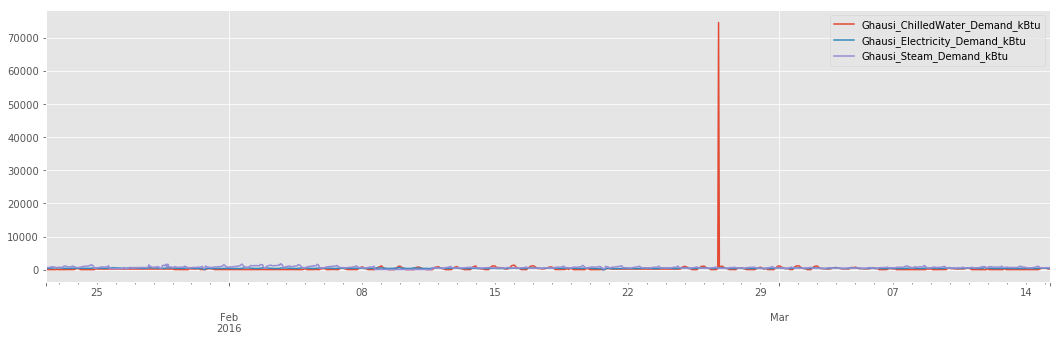

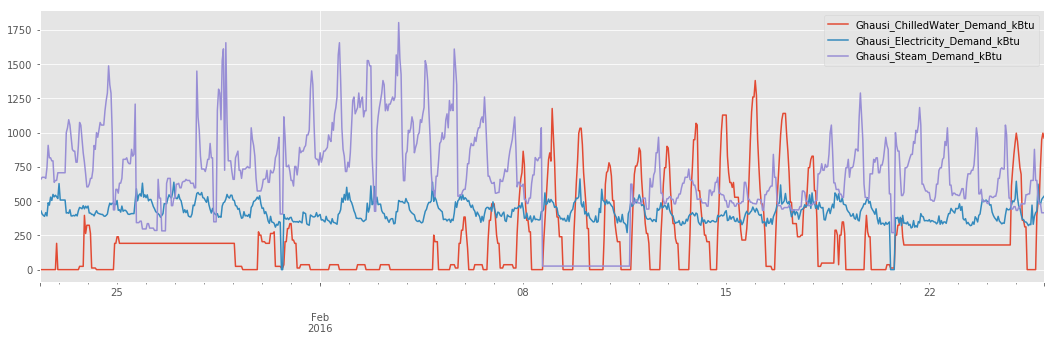

In [13]:
# select all three meters and plot them;  clearly see the outliers
point_names= ['Ghausi_ChilledWater_Demand_kBtu','Ghausi_Electricity_Demand_kBtu','Ghausi_Steam_Demand_kBtu']
dr=p.get_stream_by_point(point_names,_start="2016-01-22", _end="2016-03-15")
dr.plot(figsize=(18,5))

#show data before the spike
tSlicer=(slice("2016-01","2016-02-25"))

dr.loc[tSlicer,:].plot(figsize=(18,5))

debugging
_interpolate works
_removeNA works
_removeOutliers works
_removeOutOfBound works
_resampleData works


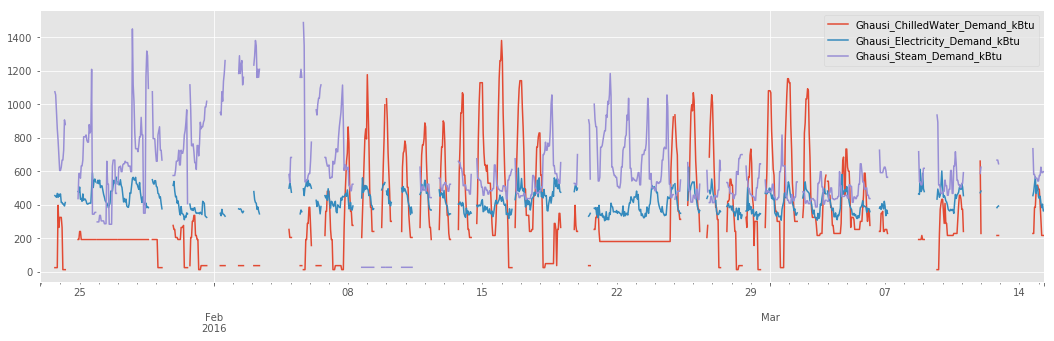

In [14]:
# run the data through data cleaning (all default inputs)
dp=data_preprocessor(dr)
tSlicer=(slice(None))
dp.data_cleaned.loc[tSlicer,:].plot(figsize=(18,5))

debugging
_removeOutliers works


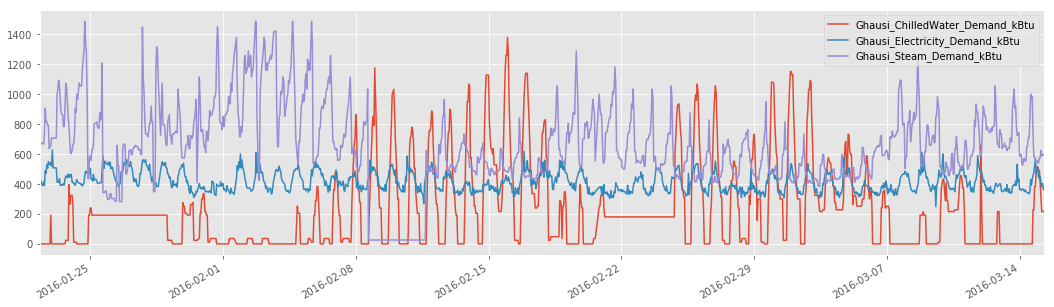

In [15]:
# run the data through data cleaning (can also choose options)
dp=data_preprocessor(dr,
                    
                    runInterpolate=False,
                    
                    runRemoveNA=False,
                   
                    runRemoveOutliers=True,
                   
                    runRemoveOutOfBound=False,
                   
                    runResample=False,
                   
                    runExtendIndex=False,
                   
                    time_res="h",
                   
                    sd_val=3,
                   
                    low_bound=0,
                   
                    high_bound=9998,
                   
                    freq="h"                    
                    
                    )
tSlicer=(slice(None))

dp.data_cleaned.loc[tSlicer,:].plot(figsize=(18,5))

In [16]:
down=pipy_datalink()

In [17]:
temp= down.get_stream_by_point(['Ghausi_Electricity_Demand_kBtu','OAT'],_start="2014",_end="t")#.plot()

Ghausi_Electricity_Demand_kBtu
P09KoOKByvc0-uxyvoTV1UfQdBkAAAVVRJTC1QSS1QXEdIQVVTSV9FTEVDVFJJQ0lUWV9ERU1BTkRfS0JUVQ
https://ucd-pi-iis.ou.ad3.ucdavis.edu/piwebapi/streams/P09KoOKByvc0-uxyvoTV1UfQdBkAAAVVRJTC1QSS1QXEdIQVVTSV9FTEVDVFJJQ0lUWV9ERU1BTkRfS0JUVQ/interpolated
<Response [200]>
OAT
P09KoOKByvc0-uxyvoTV1UfQzo8BAAVVRJTC1QSS1QXE9BVA
https://ucd-pi-iis.ou.ad3.ucdavis.edu/piwebapi/streams/P09KoOKByvc0-uxyvoTV1UfQzo8BAAVVRJTC1QSS1QXE9BVA/interpolated
<Response [200]>


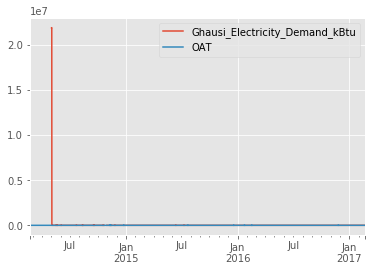

In [18]:
temp.plot()

In [19]:
dp=data_preprocessor(temp,
                    
                    runInterpolate=False,
                    
                    runRemoveNA=False,
                   
                    runRemoveOutliers=True,
                   
                    runRemoveOutOfBound=False,
                   
                    runResample=False,
                   
                    runExtendIndex=False,
                   
                    time_res="h",
                   
                    sd_val=3,
                   
                    low_bound=0,
                   
                    high_bound=9998,
                   
                    freq="h"                    
                    
                    )

debugging
_removeOutliers works


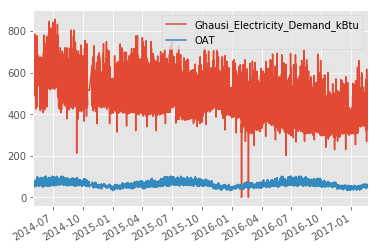

In [20]:
dp.data_cleaned.plot()

In [26]:
# 1 filter data periods
# 2 separate datasets
# 3 separate output and input
# 4 train a model
# 5 get scores for the model = validation
# 6 predict
# 7 compare 

from sklearn import svm, cross_validation, linear_model, preprocessing, ensemble
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [30]:
#1-3
tSlicer=(slice("2014-01","2014-12"))

var= 'Ghausi_Electricity_Demand_kBtu'
values = dp.data_cleaned.loc[tSlicer,var].values
values.reshape(-1, 1)


array([[ 687.1316  ],
       [ 662.203247],
       [ 672.37915 ],
       ..., 
       [ 469.237976],
       [ 485.696228],
       [ 461.280579]])

In [31]:
#4
mod = linear_model.LinearRegression()  
model_coeff = mod.fit(values, values) # output, input in np arrays

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Found input variables with inconsistent numbers of samples: [1, 5522]

In [ ]:
#5 model.score(data_train,target_train) same data for training

In [ ]:
#6
model_coeff.predict() # input period 2

In [ ]:
# compare
# real period2 var vs predicted with regression (#6)